In [1]:
# Import Dependencies 
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np 
import cv2 

2024-02-27 13:04:03.418333: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 13:04:03.418364: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 13:04:03.419561: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 13:04:03.426400: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-27 13:04:04.756541: W tensorflow/compiler/tf2

In [2]:
# Pretrained Model and Load TF Hub module
hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
model = hub.load(hub_handle)

In [3]:
# Preprocess Image 
def load_img(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img 

In [4]:
# load image 
content_img = load_img('content.jpg')
style_img = load_img('style.jpeg')

In [5]:
# Visualize Output  
content_img.shape

TensorShape([1, 1511, 850, 3])

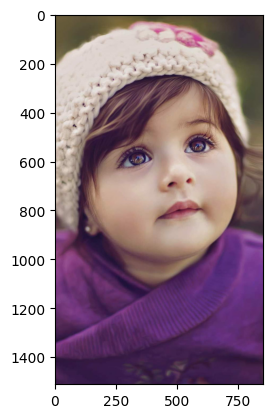

In [6]:
# show content img
plt.imshow(np.squeeze(content_img))

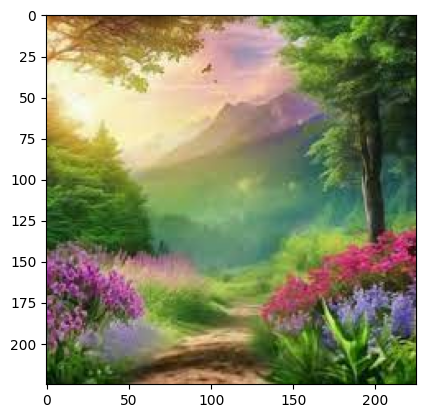

In [7]:
# show style img 
plt.imshow(np.squeeze(style_img))
plt.show()

In [8]:
# Stylize Image 
output= model(tf.constant(content_img), tf.constant(style_img))
stylize_img = output[0]

2024-02-27 13:04:10.558990: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 164396800 exceeds 10% of free system memory.
2024-02-27 13:04:10.688309: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 165001728 exceeds 10% of free system memory.
2024-02-27 13:04:16.501513: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 164892672 exceeds 10% of free system memory.
2024-02-27 13:04:16.531960: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 166105088 exceeds 10% of free system memory.
2024-02-27 13:04:16.892517: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 329785344 exceeds 10% of free system memory.


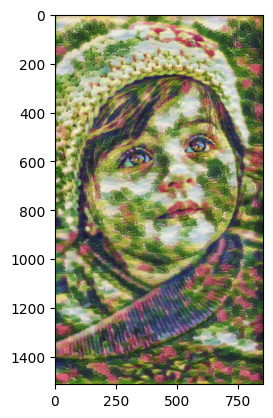

In [9]:
plt.imshow(np.squeeze(stylize_img))
plt.show()

In [10]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylize_img)*255, cv2.COLOR_BGR2RGB))

True